# Intialize NMRlipids databank

In [1]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import MDAnalysis
import urllib.request
import yaml
import random


# This defines the path for the NMRlipids databank on your computer. 
# Default is that this repository and the NMRlipids databank repository are cloned to the same folder.
# If this is not the case, change this to the folder where the NMRlipids databank repository is located.
databankPath =  '/Users/patrickfrankel/Documents/GitHub/OpenFF_Bilayer/NMRlipid_Analysis/Databank'

# This enales the access to functions defined in the NMRlipids databank.
sys.path.insert(1, databankPath + '/Scripts/BuildDatabank/')
from databankLibrary import * 

# This initializes the databank and stores the information of all simulations into a list.
# Each list item contains the information from README.yaml file of the given simulation.
systems = initialize_databank(databankPath)

/Users/patrickfrankel/anaconda3/envs/openff/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


Databank initialized from the folder: /Users/patrickfrankel/Documents/GitHub/OpenFF_Bilayer/NMRlipid_Analysis/Databank/Data/Simulations


# Print and plot basic properties of a system selected based on ID number 

system is now simulation with the ID: 809  

system is now simulation with the ID2: 376  

system is now simulation with the ID3: 457  

Membrane area per lipid: 63.16331237738059 

Membrane thickness: 4.205944816589356 

Relative equilibration time for each lipid in the simulation:
POPC: 4.049308273462371


Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible 

POPC
Databank initialized from the folder: /Users/patrickfrankel/Documents/GitHub/OpenFF_Bilayer/NMRlipid_Analysis/Databank/Data/Simulations
DOI:  10.5281/zenodo.10976008
Form factor quality:  1.0550000000000004


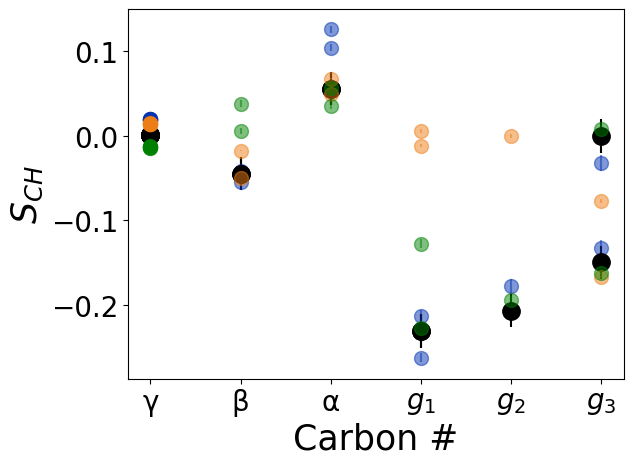

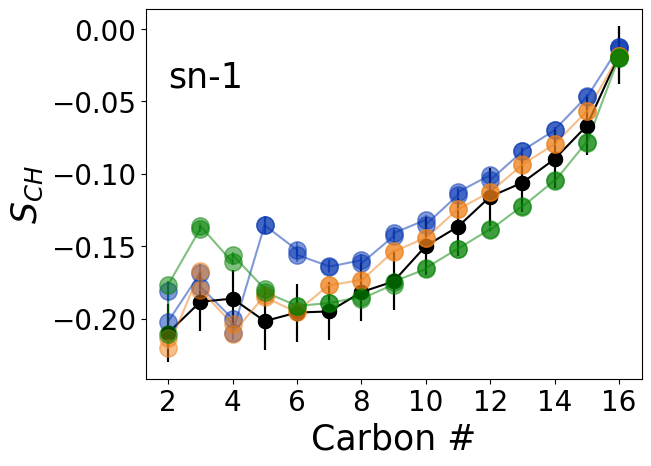

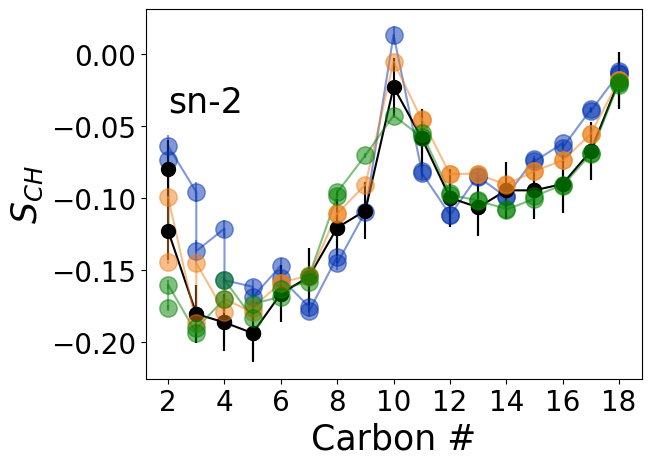

In [4]:
## Set the 'ID' number of the simulation under interest
ID = 809    #OpenFF HMR
ID2 = 376   #Slipids
ID3 = 457   #MacRog
# ID4 = 792   #OpenFF Prebuild from Macrog config

# ID = 809    #OpenFF
# ID2 = 376   #Slipids
# ID3 = 457

## Set graph components
SIM2 = True
Experimental = True

## This loop is setting the 'system' correspond to the selected 'ID'
for system in systems:
    if 'ID' in system.keys():
        if system['ID'] == ID:
            print('system is now simulation with the ID:', ID, ' \n')
            break
for system2 in systems:
    if 'ID' in system.keys():
        if system2['ID'] == ID2:
            print('system is now simulation with the ID2:', ID2, ' \n')
            break
for system3 in systems:
    if 'ID' in system.keys():
        if system3['ID'] == ID3:
            print('system is now simulation with the ID3:', ID3, ' \n')
            break
    
## Average area per lipid for the selected simulation
APL = CalcAreaPerMolecule(system)
print('Membrane area per lipid:' , APL, '\n')

## Membrane thickness for the selected simulation
thickness = GetThickness(system)
print('Membrane thickness:' , thickness, '\n')

## Relative PCA equlibration time for the selected simulation
print('Relative equilibration time for each lipid in the simulation:')
ShowEquilibrationTimes(system)
print('\n')

## Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible
print('Plot form factor and C-H bond order parameters from the simulation together with experimental data if avaible \n')
for lipid in system['COMPOSITION']:
    if lipid not in lipids_dict:
        continue
    print(lipid)
    plotSimulation(system['ID'], system2['ID'], system3['ID'], lipid, SIM2, Experimental)